# Machine Learning
#### Tuan Nguyen & Aaron Weggemans

### Problem statement
The COVID-19 was first discovered in Wuhan China in December 2019. The World Health Organisation later declared a worldwide pandemic. The corona pandemic has an unprecedented impact on all of us. As the corona virus continue to spread, the question now is what possible future development of the corona virus awaits us.  

### Goal:
For our case study, we want a strong model that can predict the number of covid cases for a country. In order to do this we need to answer the following question:

##### Which supervised learning model qualifies the most to forecast the number of covid cases? 
To answer our main question we need to answer the following sub-questions.
1. What are the correlations between covid cases, covid deaths and the covid tests?
2. What trends are visible regarding the number of covid cases around the world?
3. Which supervised learning model (Linear Regression, Multiple Linear Regression or Polynomial regression) gives us the best result in predicting the number of covid cases? 


### Plan of actions
1. Analysing covid present on a international level
2. Analysing the trends in China, Italy, United States and Autralia
3. Predict the number of covid cases using supervised machine learning models (Linear Regression, Multiple Linear Regression and Polynomial Regression)

#### Import required libraries

In [2]:
# import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#### Reading the dataset

In [3]:
# Import dataset and data preperation
df = pd.read_csv("files/Case_PRB.csv", parse_dates=True)
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49663,NaN,NaN,International,2020-10-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49664,NaN,NaN,International,2020-10-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49665,NaN,NaN,International,2020-10-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49666,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Fill in empty values by replacing empty values with integer 0
df = df.fillna(0)

### 1. What are the correlations between covid cases, covid deaths and covid tests?
Below we want to show the correlation between different columns coming from the data frame by showing the heatmap. 

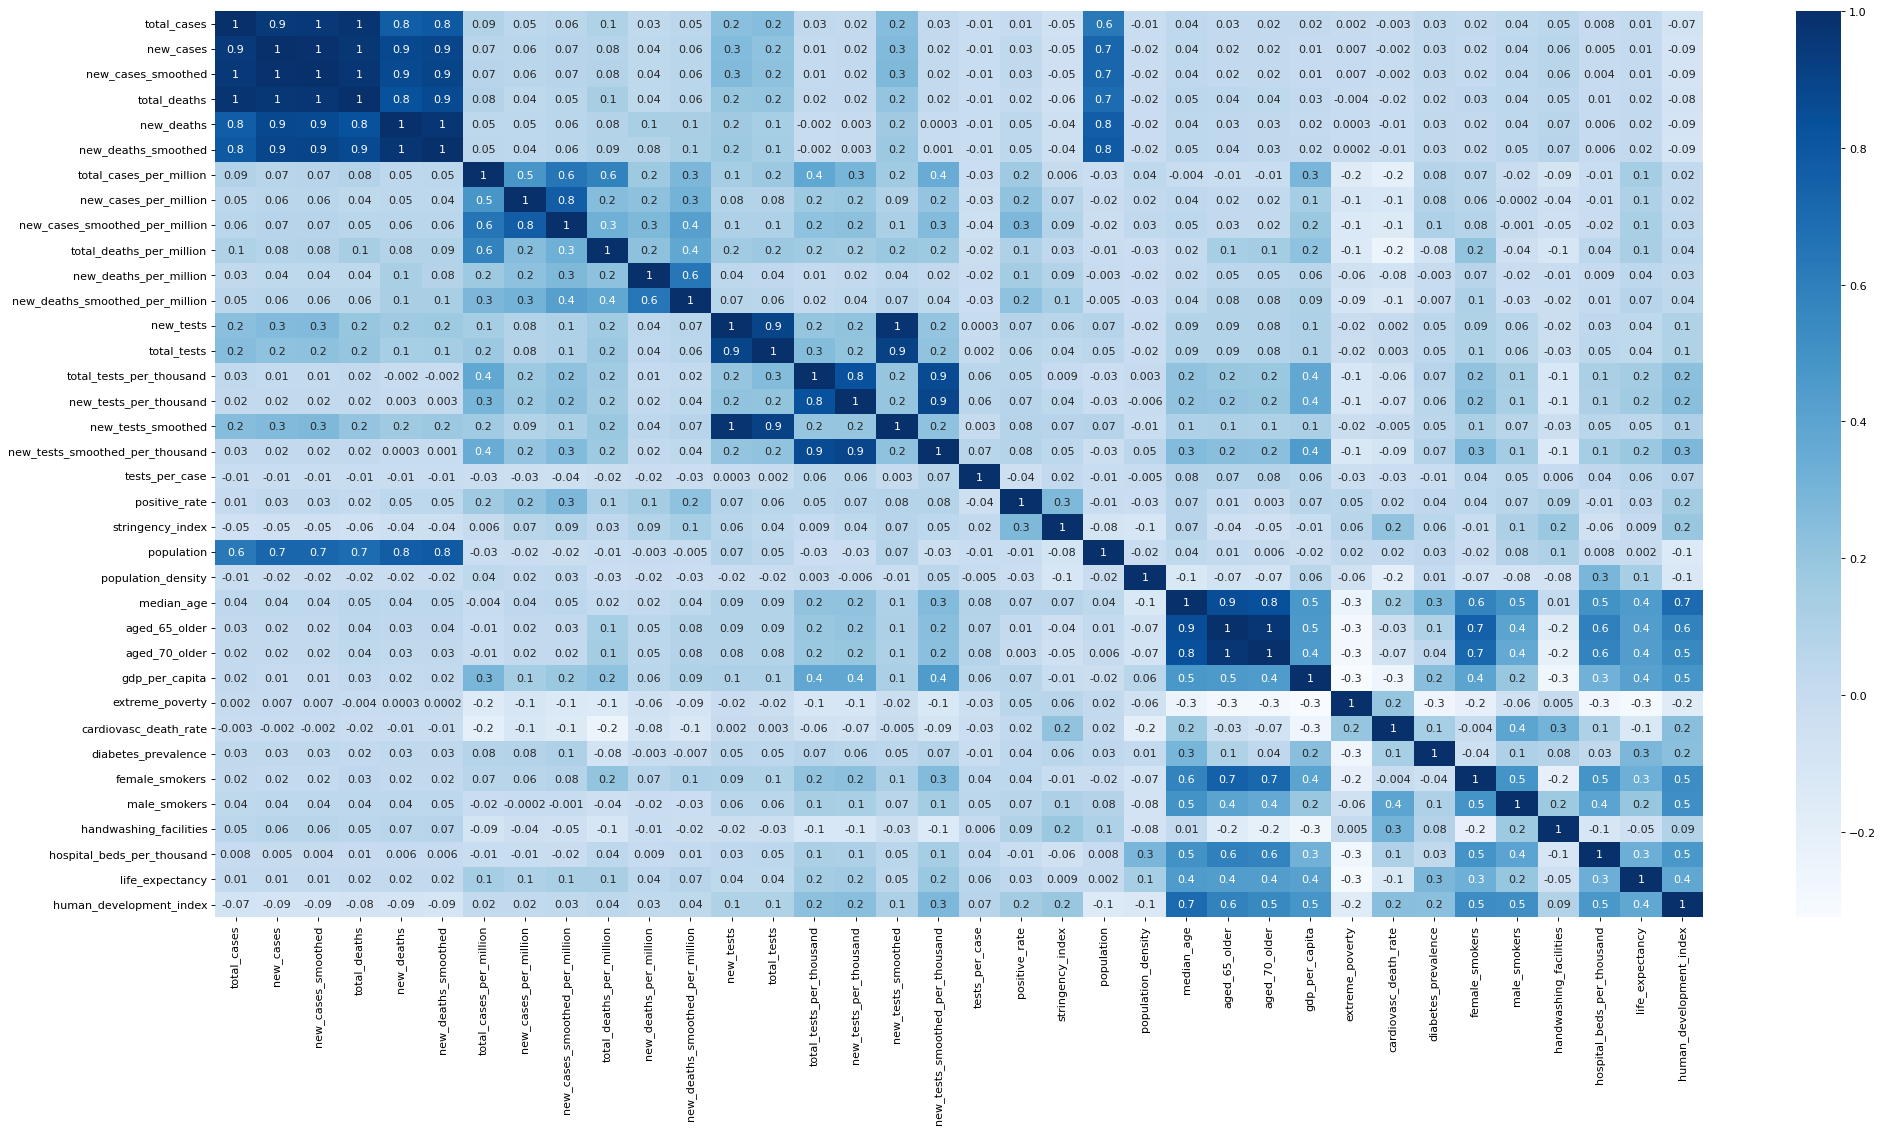

In [5]:
plt.figure(figsize=(30, 15), dpi=80)

# Remove useless data that cannot be used
cleaned_df = df[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

# Shows the heatmap correlation, annot shows the data in each cell,
# cmap blues is the color theme, fmt the amount of numbers in the cell
sns.heatmap(cleaned_df.corr(), annot=True, cmap="Blues", fmt='.001g')
plt.show()

### 2. What trends are visible regarding the number of covid cases around the world?

#### 2.1 Analysing covid present on a international level

Below we want to show the spread of the covid cases on a international level. 

Text(0, 0.5, 'Number of cases')

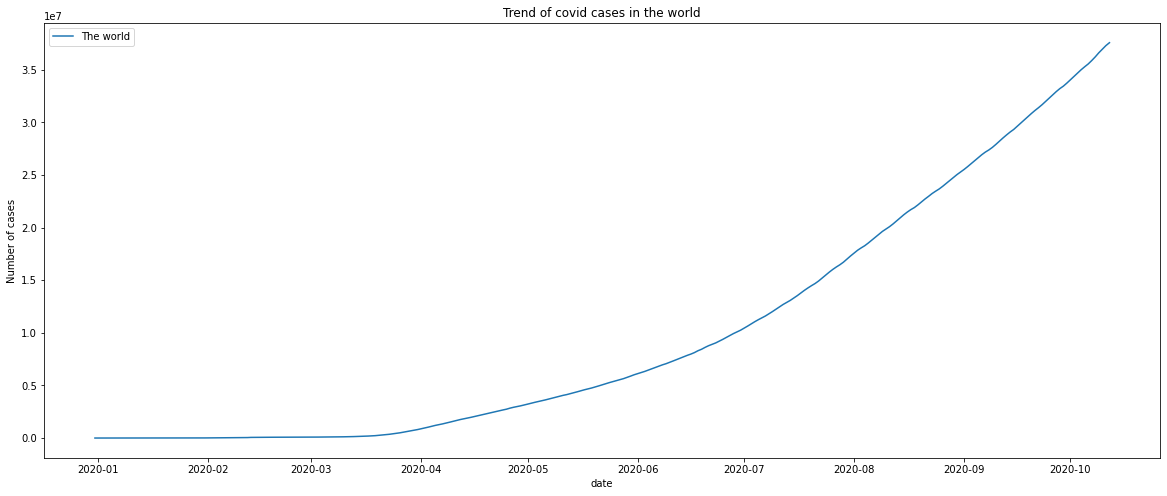

In [6]:
df_world = df[(df['location'] == "World")]

# Determine the figure size
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(pd.to_datetime(df_world['date']), df_world['total_cases'], label="The world")
plt.legend()
plt.title("Trend of covid cases in the world")
plt.xlabel("date")
plt.ylabel("Number of cases")

#### 2.2 Analysing the trends in China, Italy, United States and Autralia

In [7]:
# data preparation
df_china = df[(df['location'] == "China")]
df_australia = df[(df['location'] == "Australia")]
df_italy = df[(df['location'] == "Italy")]
df_usa = df[(df['location'] == "United States")]

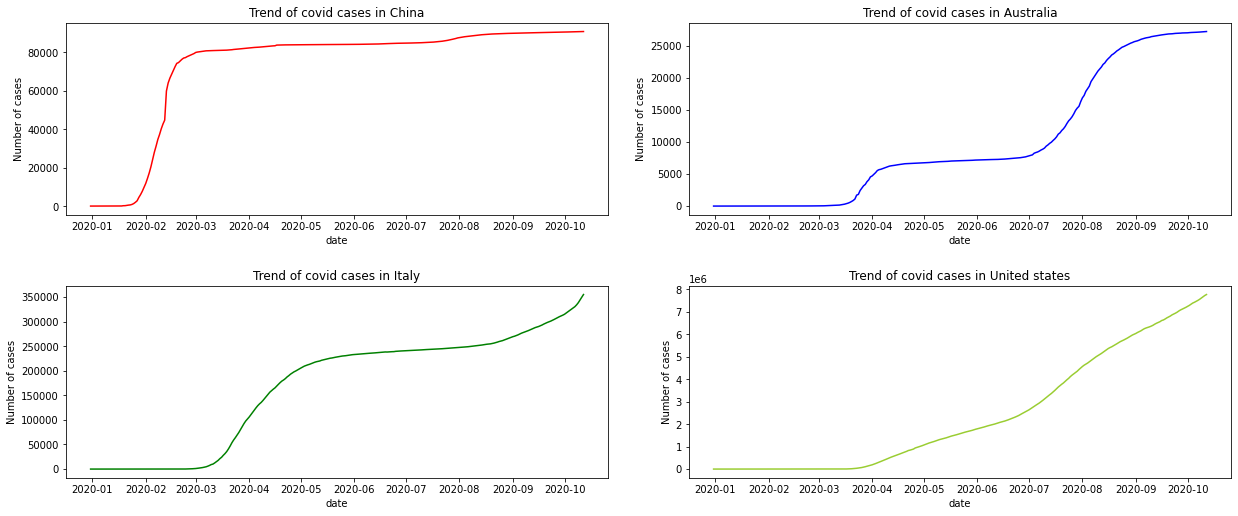

In [9]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].plot(pd.to_datetime(df_china['date']), df_china['total_cases'], label="China", color="red")
ax[0, 0].set_title("Trend of covid cases in China")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Number of cases")

ax[0, 1].plot(pd.to_datetime(df_australia['date']), df_australia['total_cases'], label="australia", color='blue')
ax[0, 1].set_title("Trend of covid cases in Australia")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Number of cases")

ax[1, 0].plot(pd.to_datetime(df_italy['date']), df_italy['total_cases'], label="Italy", color="green")
ax[1, 0].set_title("Trend of covid cases in Italy")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Number of cases")

ax[1, 1].plot(pd.to_datetime(df_usa['date']), df_usa['total_cases'], label="United States", color="yellowgreen")
ax[1, 1].set_title("Trend of covid cases in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Number of cases")
plt.show()

To give us another perspective, below we want to show the percentage of the population for a country that is infected with the corona virus.

In [10]:
# Select the population of country, doesn't matter which index since the population is a constant value in the dataset
total_population_china = df_china.iloc[0]['population']
total_population_australia = df_australia.iloc[0]['population']
total_population_italy = df_italy.iloc[0]['population']
total_population_usa = df_usa.iloc[0]['population']

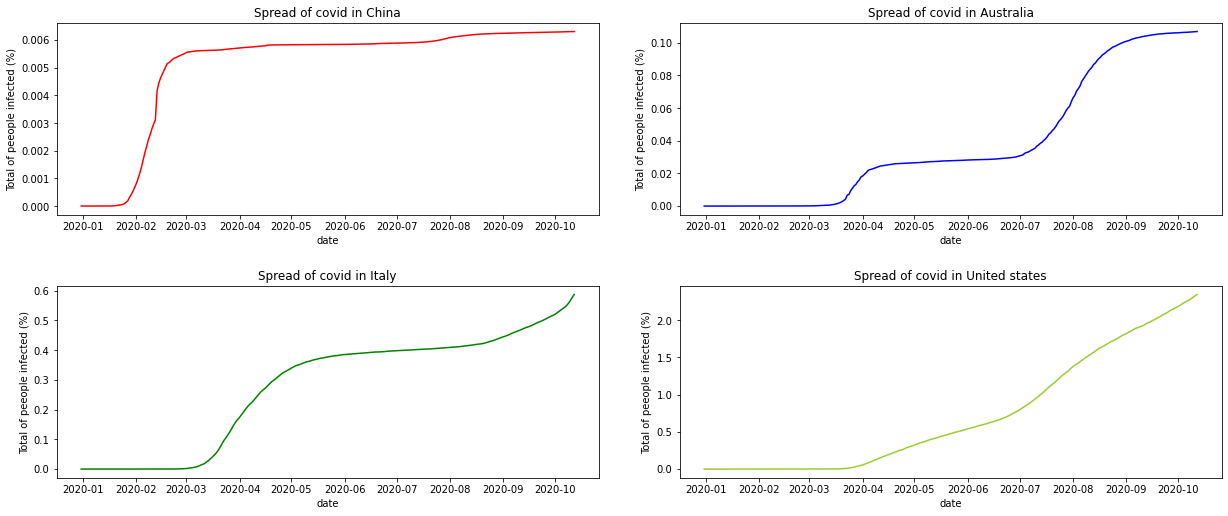

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].plot(pd.to_datetime(df_australia['date']), (100/total_population_china * df_china['total_cases']), label="australia", color='red')
ax[0, 0].set_title("Spread of covid in China")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Total of peeople infected (%)")

ax[0, 1].plot(pd.to_datetime(df_china['date']), (100/total_population_australia * df_australia['total_cases']), label="China", color="blue")
ax[0, 1].set_title("Spread of covid in Australia")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Total of peeople infected (%)")

ax[1, 0].plot(pd.to_datetime(df_italy['date']), (100/total_population_italy * df_italy['total_cases']), label="Italy", color="green")
ax[1, 0].set_title("Spread of covid in Italy")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Total of peeople infected (%)")

ax[1, 1].plot(pd.to_datetime(df_usa['date']), (100/total_population_usa * df_usa['total_cases']), label="United States", color="yellowgreen")
ax[1, 1].set_title("Spread of covid in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Total of peeople infected (%)")
plt.show()

#### 2.3 Analysing the trends into a barplot based on every month

In [12]:
# Sets the timestamps to each month
def set_to_df_with_filter(df):
  df = pd.DataFrame({'timestamp': pd.to_datetime(df['date'], errors='coerce'), 'total_cases': df.total_cases})
  df['timestamp'] = df['timestamp'].apply(lambda x: "%d-%d" % (x.month, x.year))  
  df = df.loc[df["timestamp"].shift() != df["timestamp"]]
  df.groupby(['timestamp', 'total_cases']).size()

  timestamp = df['timestamp']
  total_cases = df['total_cases']

  return np.array(timestamp), np.array(total_cases)

# Import data and preparation
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

# Retrieve the dataframe for the United States
df_italy = df[(df['location'] == "Italy")]
df_australia = df[(df['location'] == "Australia")]
df_usa = df[(df['location'] == "United States")]
df_china = df[(df['location'] == "China")]

# Sets the values to the x and y for timestamps and total cases
italy_X, italy_y = set_to_df_with_filter(df_italy)
australia_X, australia_y = set_to_df_with_filter(df_australia)
usa_X, usa_y = set_to_df_with_filter(df_usa)
china_X, china_y = set_to_df_with_filter(df_china)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


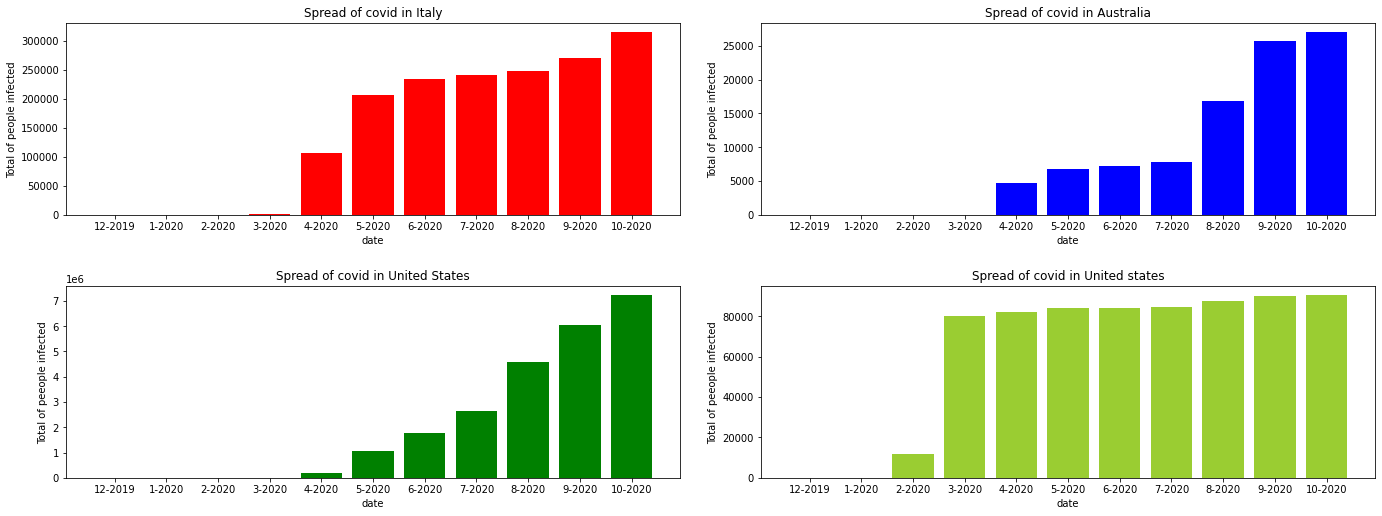

In [13]:
# Plot infomration
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].bar(italy_X, italy_y, label="Italy", color='red')
ax[0, 0].set_title("Spread of covid in Italy")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Total of people infected")

ax[0, 1].bar(australia_X, australia_y, label="Australia", color="blue")
ax[0, 1].set_title("Spread of covid in Australia")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Total of people infected")

ax[1, 0].bar(usa_X, usa_y, label="United States", color="green")
ax[1, 0].set_title("Spread of covid in United States")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Total of peeople infected")

ax[1, 1].bar(china_X, china_y, label="United States", color="yellowgreen")
ax[1, 1].set_title("Spread of covid in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Total of peeople infected")
plt.show()

### 3. Which supervised learning model (Simple Linear Regression, Multiple Linear Regression or Polynomial regression) gives the best result in predicting the number of covid cases? 
The dependent variable that we want to predict is the number of covid cases. This is a continuous value, therefore this is a regression problem. For this problem we want to utilize the following supervised machine learning models: Simple Linear Regression, Multiple Linear Regression and Polynomial Regression.

#### 3.1 Simple Linear Regression
Since the Linear Regression is easy to understand and to implement, we plan to start to with the Linear Regression. A disadvantage of Simple Linear Regression is that it is not flexibel. This model works well when the relationship between the data are linear. We deployed a approach predicting the spread of covid cases in pre selected country, which is 'Italy'. Yet the same approach can be applied in any other countries as well.

0.8772367497522123
1584524017.9746642


[]

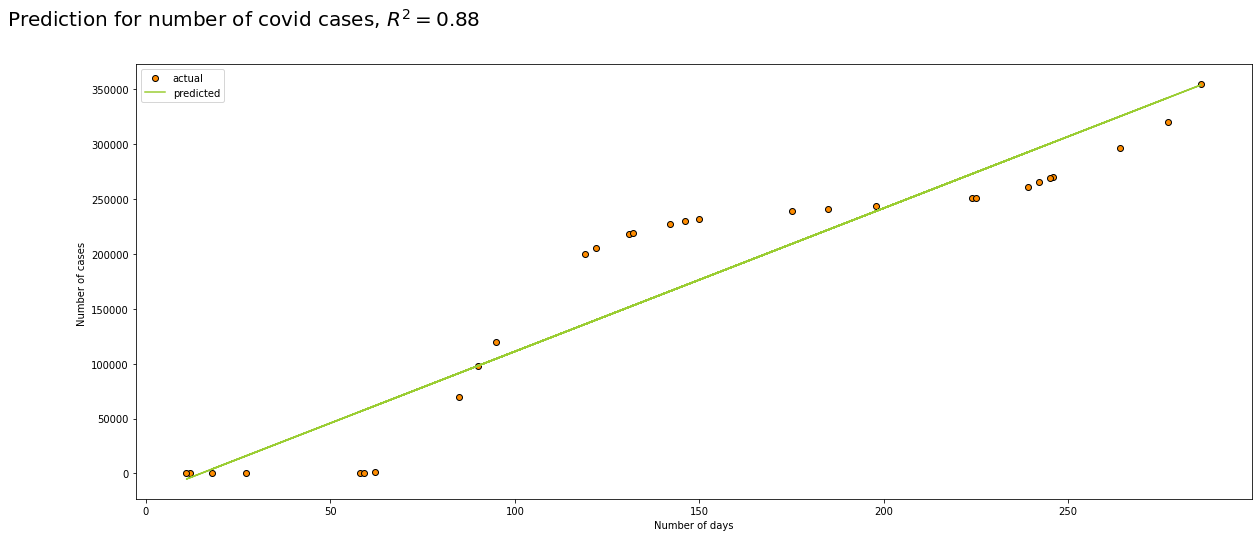

In [14]:
# Data preparation
df = df[(df['location'] == "Italy")]

df['time'] = np.arange(len(df.index))
X = df[['time']]
y = df[['total_cases']]

# Split data into train (90%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = 1)

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

# Evaluate
r2 = lr.score(X_test, y_test)
print(r2)

# Mean Squared Error
mse = MSE(y_test, predictions)
print(mse)

# Plot
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="actual")
plt.plot(X_test, predictions, color="yellowgreen", label="predicted")
plt.suptitle('Prediction for number of covid cases, $R^2 = %.2f$'.format("") % r2, fontsize=20, x=0.2)
plt.xlabel('Number of days')
plt.ylabel('Number of cases ')
plt.legend()
plt.plot()

#### 3.2 Polynominal Regression

The benefits of using Polynominal Regression is that is can identify the curvilinear relationship between independent and dependen variables. A big disadvantage of using the Polynominal Regression is that little outliers in the data can seriously affect the result of a nonlinear analysis. Another disadvantage of using Polynominal Regression is that there are fewer model validation tools for detecting outliers in nonlinear regression than there are for linear regression. 

0.9093822677740442


[]

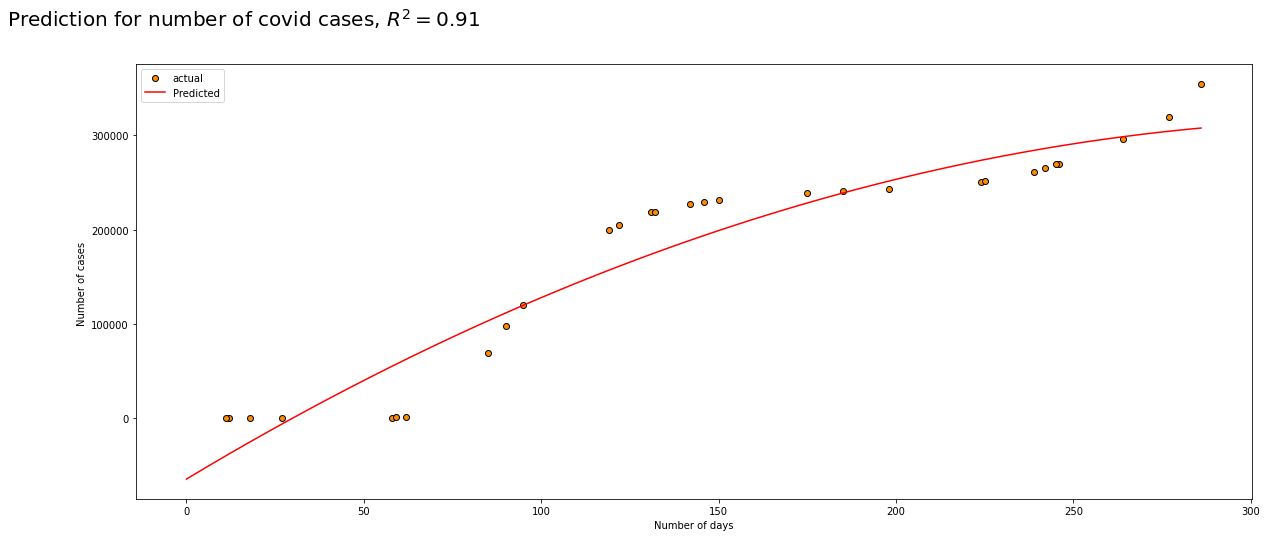

In [15]:
# Data preparation
df['time'] = np.arange(len(df.index))
X = df[['time']]
y = df[['total_cases']]

# Split data into train (90%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = 1)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree = 2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

coefficient = lr.coef_
intercept = lr.intercept_
predictions = lr.predict(X_test_poly)

r2 = metrics.r2_score(predictions, y_test)
print(r2)

axis = np.linspace(0, df['time'].max(), 200)
response = intercept + coefficient[0][1] * axis + coefficient[0][2] * axis**2

plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="actual")
plt.plot(axis, response, c='r', label="Predicted")
plt.suptitle('Prediction for number of covid cases, $R^2 = %.2f$' % r2, fontsize=20, x=0.2)
plt.xlabel('Number of days')
plt.ylabel('Number of cases ')
plt.legend()
plt.plot()

#### 3.3 Mulitple Linear Regression

The advantage of Multiple Linear Regression is that it is a technique that aims to predict a variable from serveral other variables (i.e, For our case study we will look into number of days,the amount of covid deaths to predict the number of covid cases). On the other hand, a disadvantage can be that compared to a Lineare Regression or a Polynomial regression, it is more difficult to read. Another disadvantage of using Multiple Linear Regression is that, when using the wrong information, there is a change that it may happen that an incorrect correlation is drawn between variables.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Accuracy score: 0.9802622594832429
Accuracy score: 0.8578137267245762


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


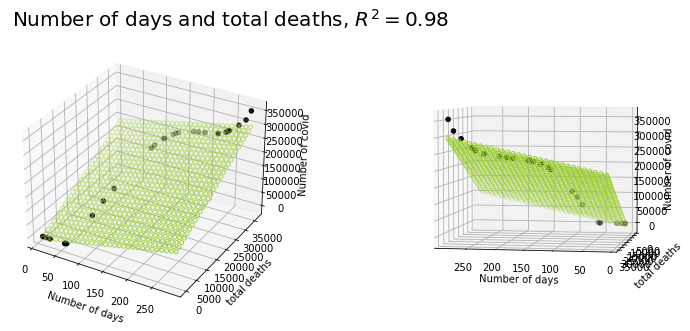

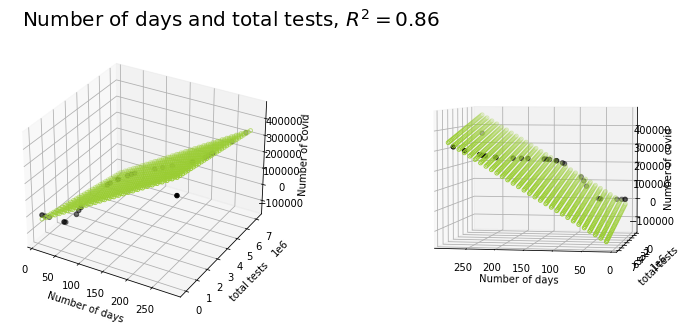

In [16]:
# Data preparation
df['time'] = np.arange(len(df.index))
cs = ['total_deaths', 'total_tests']

for i in cs:
  X2  = df[["time", i]]
  y = df[['total_cases']]

  # Split data into train (90%) and test (10%)
  X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size =0.1, random_state = 1)

  # Preparing data for visualization
  x_pred = np.linspace(X_test['time'].min(), X_test['time'].max(), 30) 
  y_pred = np.linspace(X_test[i].min(), X_test[i].max(), 30) 

  xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
  model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

  # Train
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  predictions = lr.predict(model_viz)

  # Evaluate
  r2 = lr.score(X_test, y_test)
  print(f"Accuracy score: {r2}")

  # Plot
  fig = plt.figure(figsize=(20, 5))

  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')

  axes = [ax1, ax2]
  r_i = i.replace("_", " ")
  for ax in axes:
    ax.scatter(X_test['time'], X_test[i], y_test, c='black')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predictions, facecolor=(0,0,0,0), s=15, edgecolor='yellowgreen')
    ax.set_xlabel('Number of days')
    ax.set_ylabel(r_i) # filter out _ char
    ax.set_zlabel('Number of covid')
    ax.locator_params(nbins=7, axis='x')

  fig.suptitle('Number of days and {0}, $R^2 = %.2f$'.format(r_i) % r2, fontsize=20, x=0.3)

  ax2.view_init(elev=4, azim=100)

### Conclusion

We have developed several machine learning models to predict the number of covid cases. We have used the Simple Linear Regression, Multiple Linear Regression and the Polynomial Regression. Our result shows that the Simple Linear Regression 88% of dependent variability can be explained by this model. The multiple linear regression can be interpret that around 98% of dependent variability can be explained by the model where the total death is included as an independent variable. When the total tests is included as a independent variable the model give a adjusted square value of 86%. And lastly, the Polynominal Regression model shows 80% of the dependent variability can be explained by this model. All model are used to predict the number of covid cases for the country Italy. Moreover, this model can also be applied to other countries. Analysing the trend we can see that the spread of the virus is not linear. Simple Linear Regression algorithm works well when the relationship between the data is linear. This is not the case with the covid numbers. Hence, the Polynominal Regression overcome this problem by identifying the curvillinear relationship between independent and dependent variable. Therefore our conclusion is that the Polynominal Regression is best fit to predict the number over covid cases. 